In [30]:
import pandas as pd

df = pd.read_csv("dataset.csv")

In [31]:
df.shape

(25000, 16)

In [32]:
increase = 0
decrease = 0
stable = 0


for _, row in df.iterrows():
    if row["label"]=="Increase":
        increase = increase + 1
    elif row["label"]=="Decrease":
        decrease = decrease + 1
    else:
        stable = stable + 1
# print(df.shape)
print("Credit Score increase = ", increase)
print("Credit Score decrease = ", decrease)
print("Credit Score stable = ", stable)

Credit Score increase =  11768
Credit Score decrease =  3346
Credit Score stable =  9886


# EDA


In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

numeric_cols = df.select_dtypes(include=['float', 'int'])
categorical_cols = df['label']

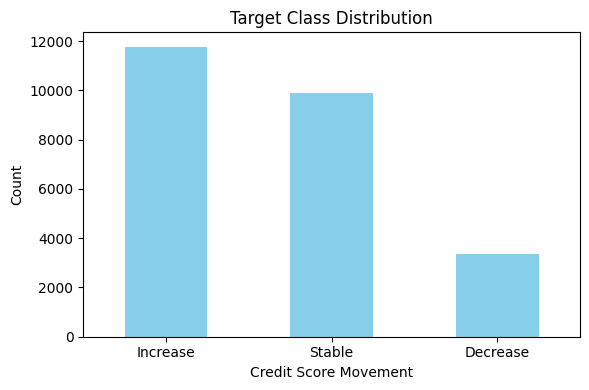

In [35]:
 # 1. Target Class Distribution
plt.figure(figsize=(6, 4))
df['label'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Target Class Distribution')
plt.xlabel('Credit Score Movement')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

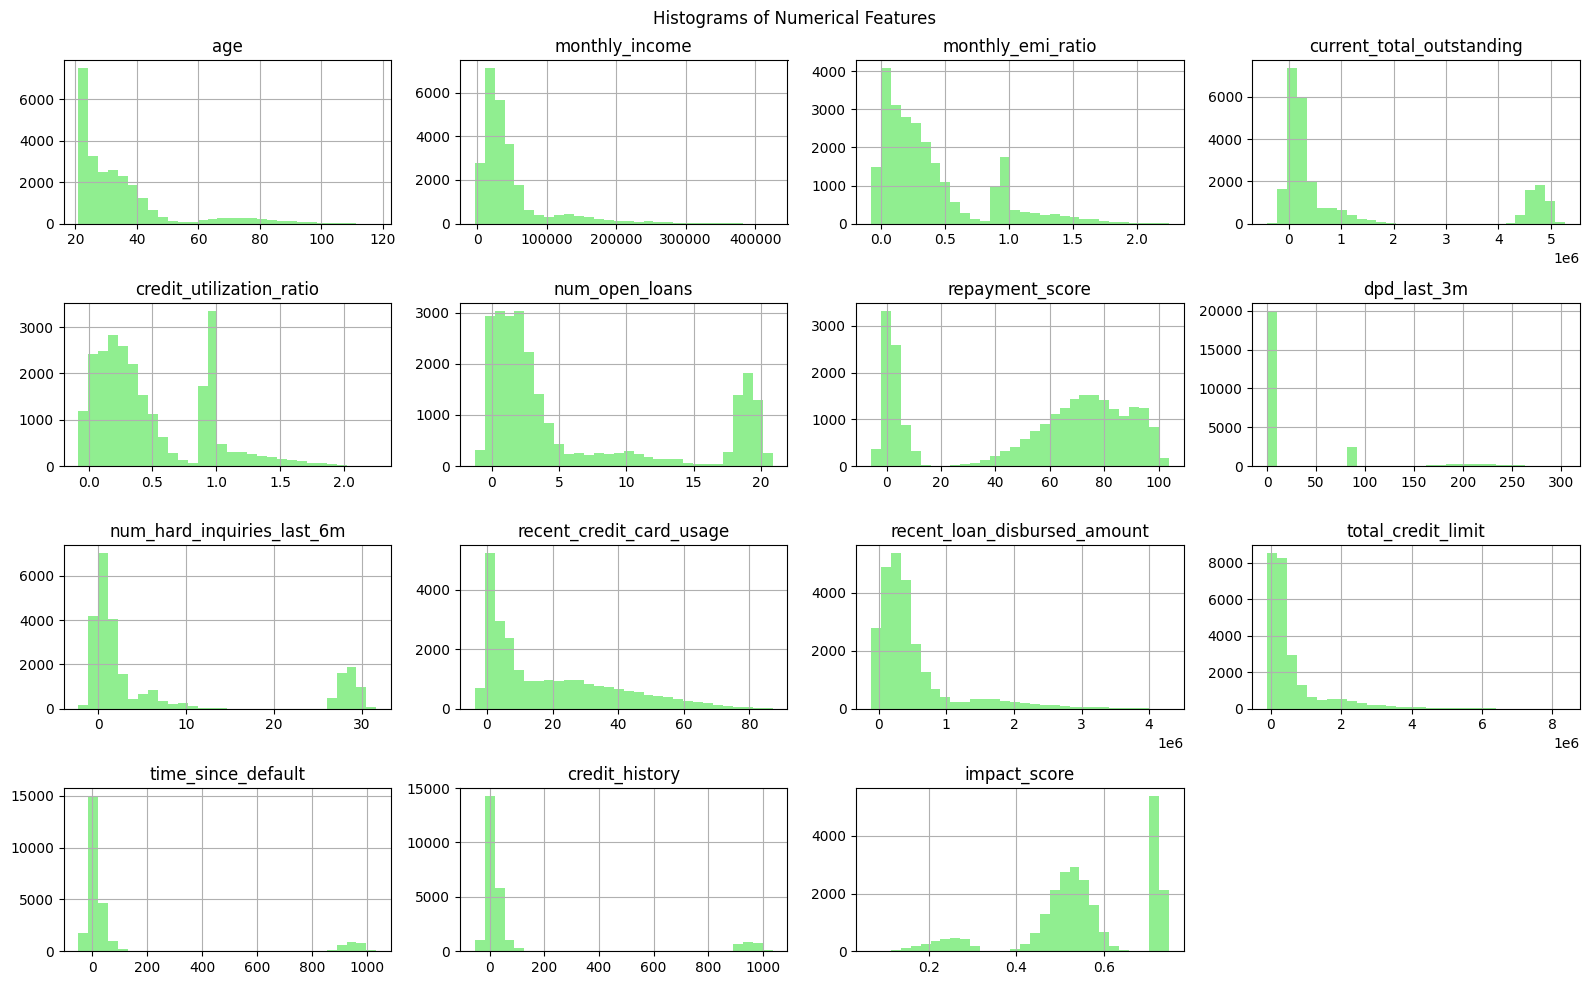

In [36]:
numeric_cols = numeric_cols.columns.tolist()
df[numeric_cols].hist(figsize=(16, 10), bins=30, color='lightgreen')
plt.suptitle('Histograms of Numerical Features')
plt.tight_layout()
plt.show()

Takeaway : These distributions suggest that normalization or transformation (such as log-scaling) may be beneficial before modeling.


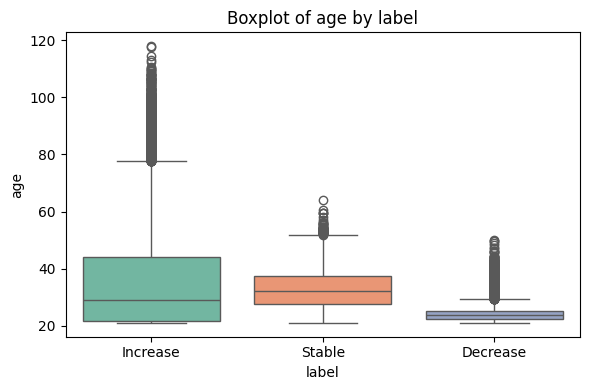

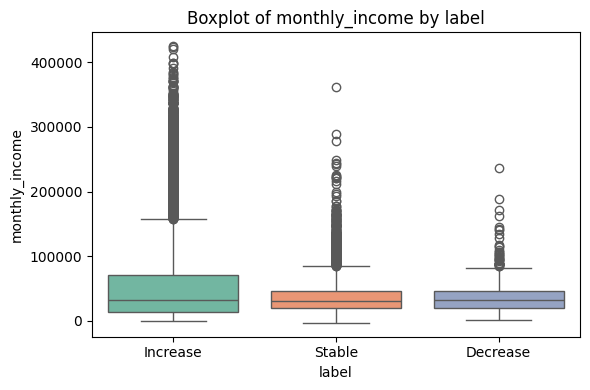

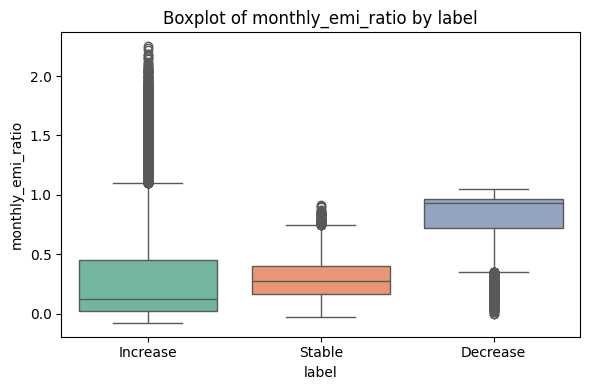

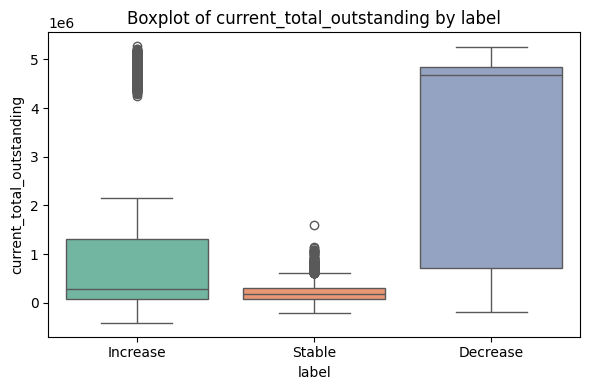

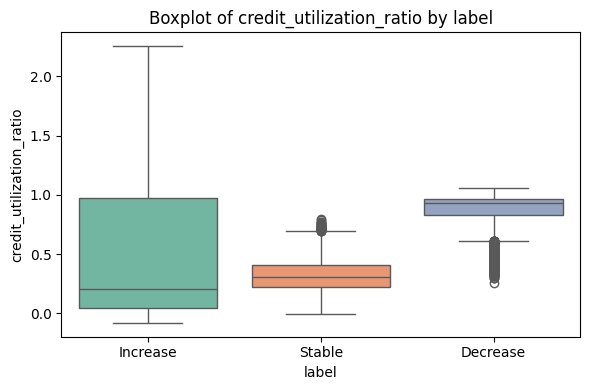

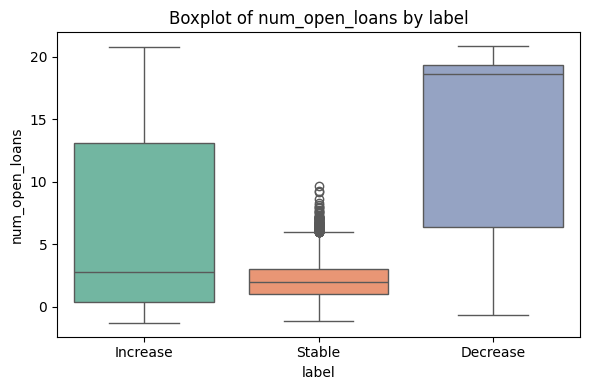

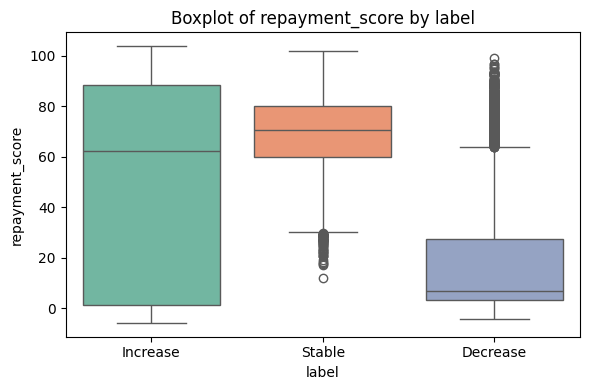

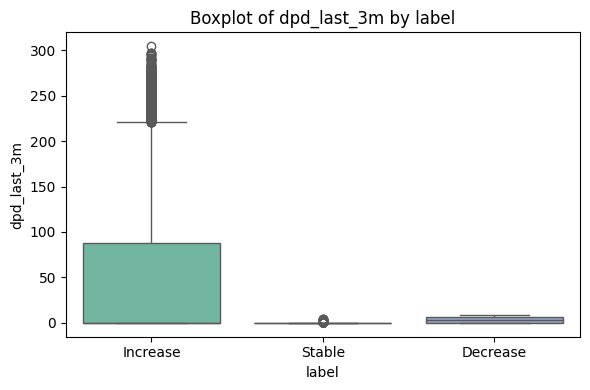

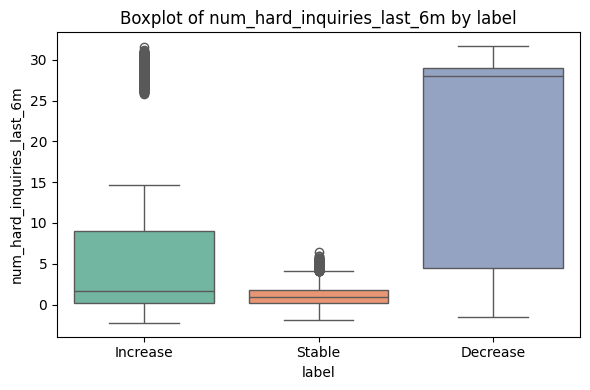

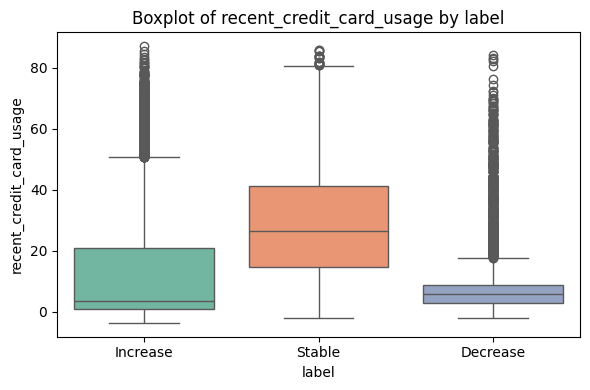

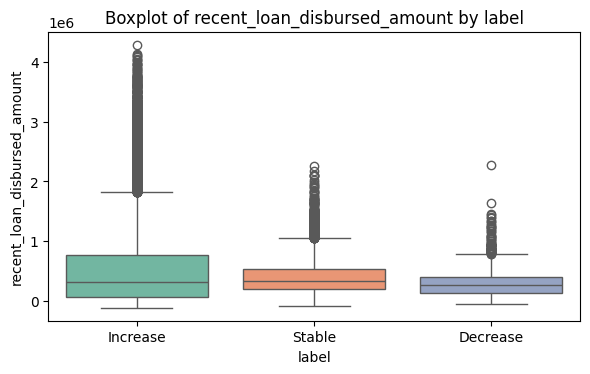

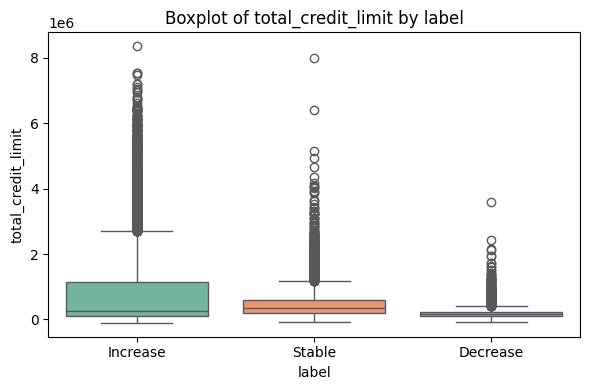

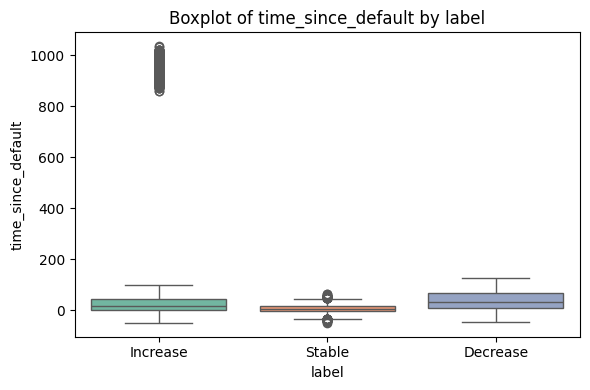

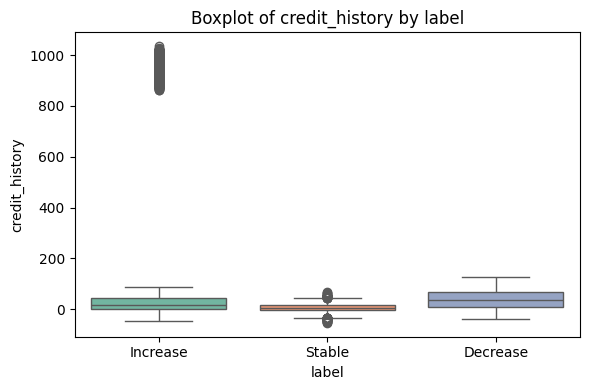

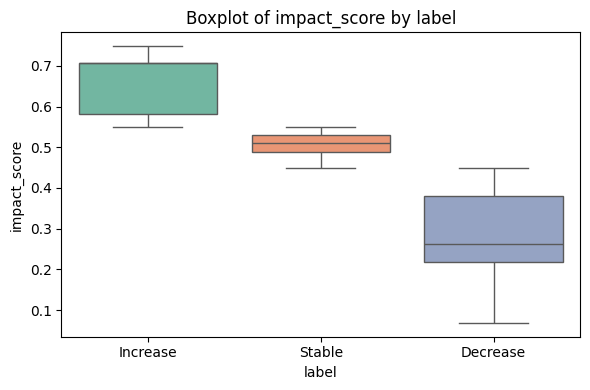

In [37]:
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x='label', y=col, hue='label', palette="Set2", legend=False)

    plt.title(f'Boxplot of {col} by label')
    plt.tight_layout()
    plt.show()

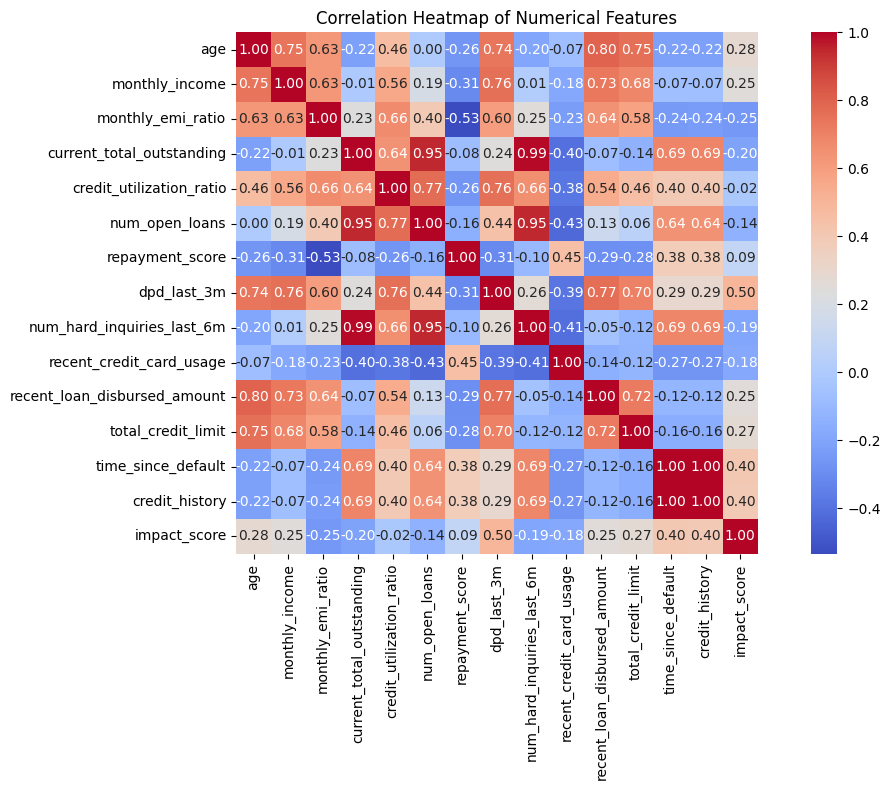

In [38]:
plt.figure(figsize=(12, 8))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()

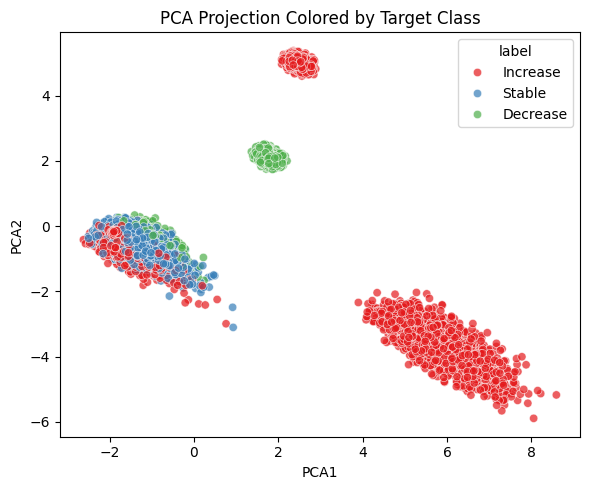

In [39]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[numeric_cols].fillna(0))
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
pca_df['label'] = df['label'].values
plt.figure(figsize=(6, 5))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='label', palette='Set1', alpha=0.7)
plt.title('PCA Projection Colored by Target Class')
plt.tight_layout()
plt.show()

Takeaway : 

- The "Decrease" class (green) forms a very tight, isolated cluster. This means the underlying features of these samples are very consistent and different from the other classes. 
- The "Increase" class (blue) is also well-separated, although it appears to be split into two distinct sub-clusters: a large, elongated group in the top-right and a smaller, tight group in the bottom-right.  It suggests there might be two different "types" or "reasons" for an "Increase."
- The "Stable" class (red) is clustered on the left but shows significant overlap with some of the "Increase" and "Decrease" samples in that region.


Takeaway : 
- We will models handle non-linear relationships, are resilient to outliers, and can manage correlated features well such as XGBoost, random-forest or logistic regression.

In [56]:
#Encoding the labels
from tabulate import tabulate
# Using LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['label_encoded'] = le.fit_transform(df['label'])
df_encoded = df.drop('label',axis=1)
print(tabulate(df_encoded.head(100), headers='keys', tablefmt='grid'))

+----+---------+------------------+---------------------+-----------------------------+----------------------------+------------------+-------------------+---------------+------------------------------+----------------------------+--------------------------------+----------------------+----------------------+------------------+----------------+-----------------+
|    |     age |   monthly_income |   monthly_emi_ratio |   current_total_outstanding |   credit_utilization_ratio |   num_open_loans |   repayment_score |   dpd_last_3m |   num_hard_inquiries_last_6m |   recent_credit_card_usage |   recent_loan_disbursed_amount |   total_credit_limit |   time_since_default |   credit_history |   impact_score |   label_encoded |
+====+=========+==================+=====================+=============================+============================+==================+===================+===============+==============================+============================+================================+======

In [ ]:
from sklearn.preprocessing import PowerTransformer
import numpy as np

# Plot before and after histograms using log1p and Yeo-Johnson
fig, axs = plt.subplots(len(numeric_cols), 3, figsize=(15, 4 * len(numeric_cols)))

for i, col in enumerate(numeric_cols):
    # Original
    axs[i, 0].hist(df_encoded[col], bins=50, color='salmon')
    axs[i, 0].set_title(f'Original {col}')
    
    # Log1p Transform
    log_data = np.log1p(df_encoded[col])
    axs[i, 1].hist(log_data, bins=50, color='lightblue')
    axs[i, 1].set_title(f'Log1p Transformed {col}')
    
    # Yeo-Johnson Transform
    pt = PowerTransformer(method='yeo-johnson')
    yeo_data = pt.fit_transform(df_encoded[[col]])
    axs[i, 2].hist(yeo_data, bins=50, color='lightgreen')
    axs[i, 2].set_title(f'Yeo-Johnson Transformed {col}')

plt.tight_layout()
plt.show()